In [1]:
import numpy as np
import pandas as pd

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from qiskit.utils import algorithm_globals
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms.classifiers import VQC

from IPython.display import clear_output
import time

C:\Users\rutsm\AppData\Local\Temp\ipykernel_15924\722006560.py:17: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import COBYLA


In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,SI1,SI2,SI3,SI4,SI5,SI6,SI7,SI8,SI9,SI10,class
0,38.29,38.29,38.29,38.29,38.29,38.29,38.66,38.66,38.66,38.66,1
1,39.03,38.66,39.03,39.03,39.03,39.03,39.03,39.03,39.03,39.03,1
2,39.41,39.41,39.41,39.41,39.41,39.41,39.78,39.41,39.78,39.78,1
3,39.78,39.78,39.78,39.78,40.15,40.15,40.15,40.15,40.15,40.15,1
4,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,40.52,1


In [3]:
df.isna().sum()

SI1      0
SI2      0
SI3      0
SI4      0
SI5      0
SI6      0
SI7      0
SI8      0
SI9      0
SI10     0
class    0
dtype: int64

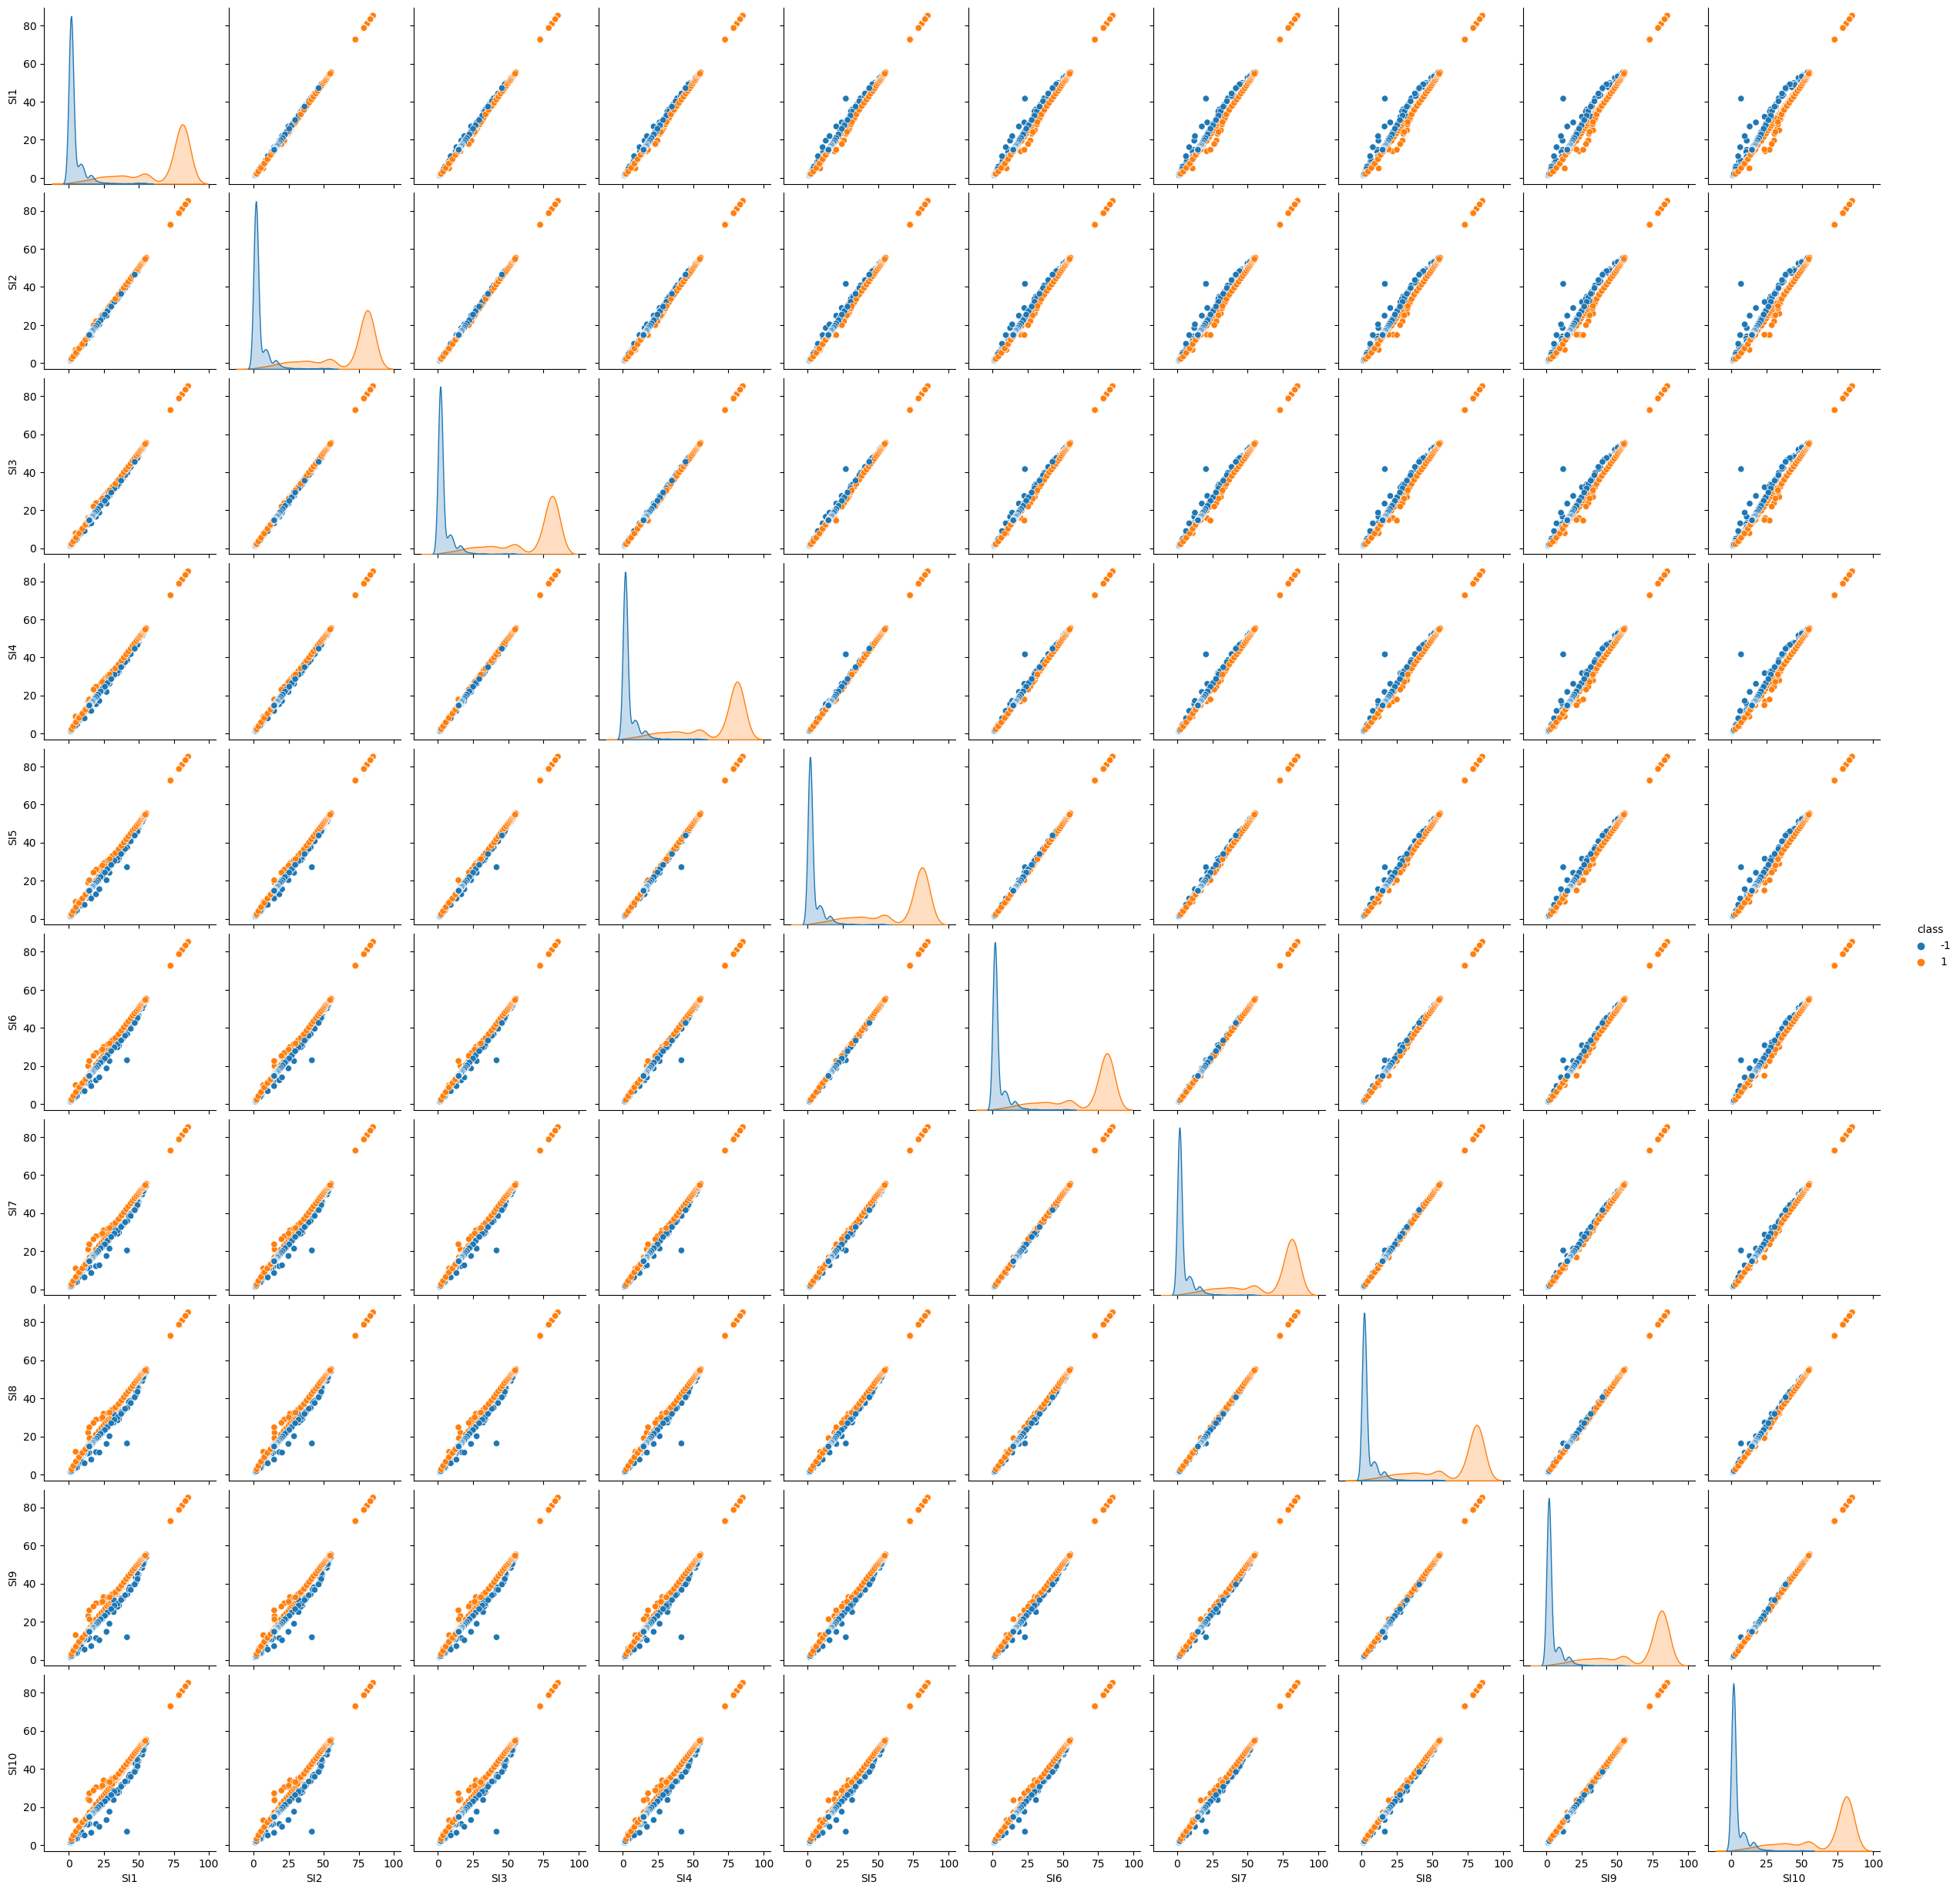

In [4]:
sns.pairplot(df, hue="class", palette="tab10")

## Feature Map

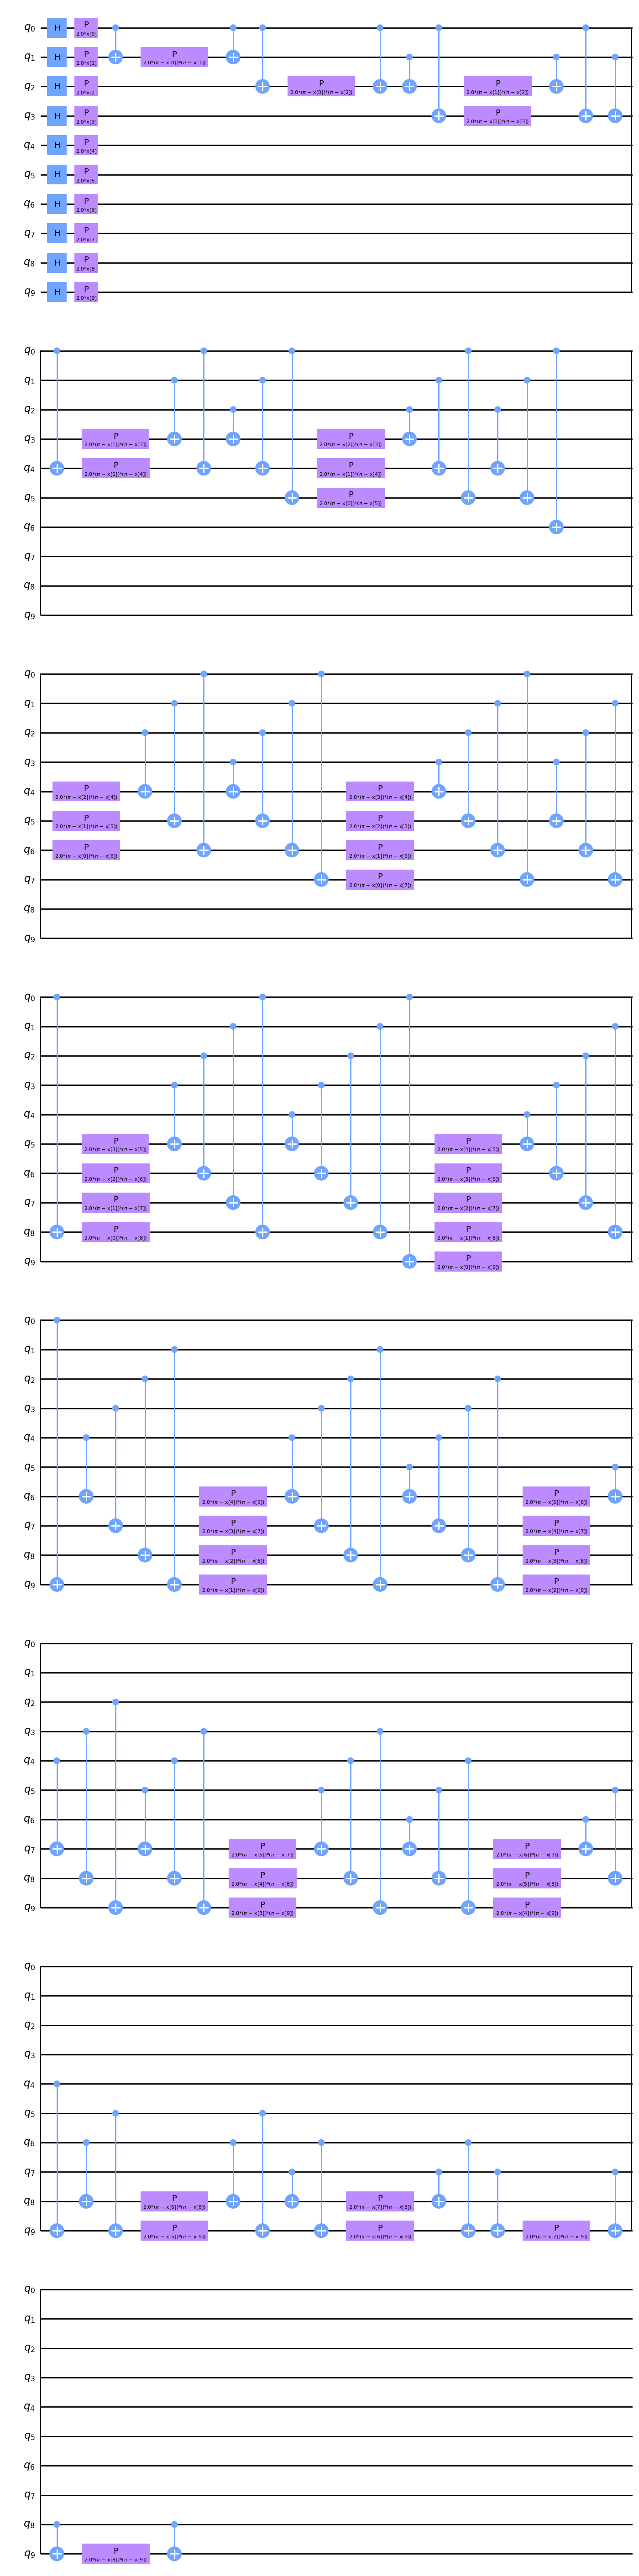

In [4]:
features = df.drop(columns=['class'])

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

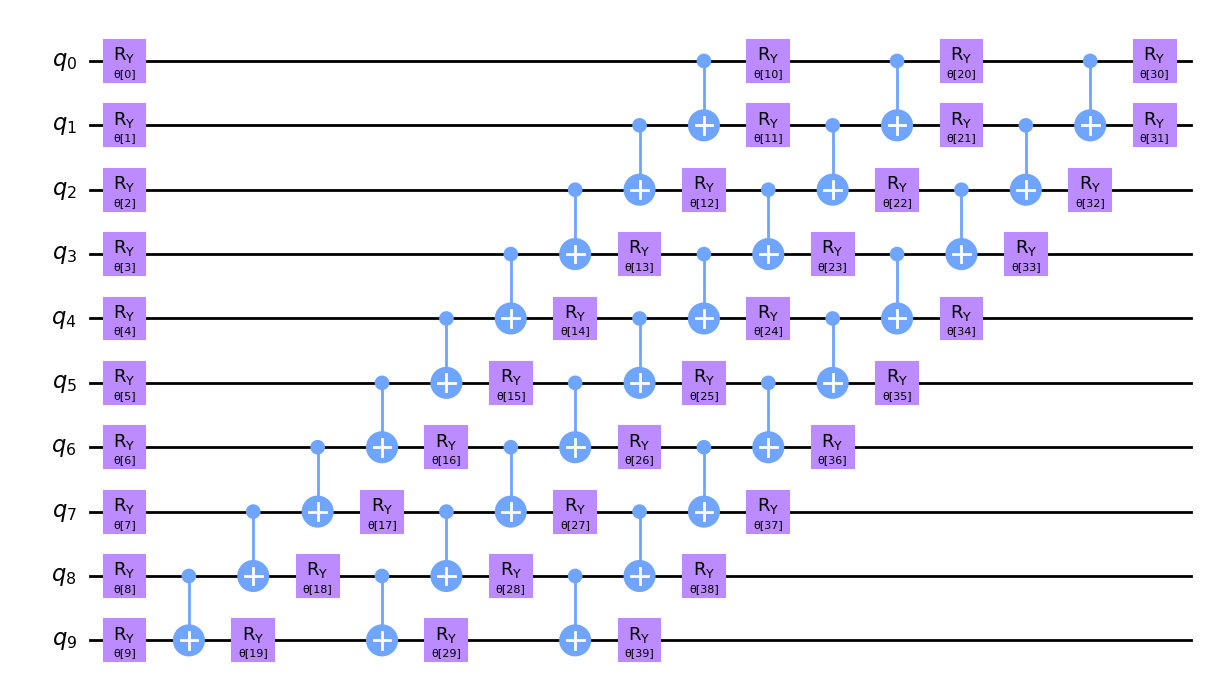

In [5]:
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [6]:
optimizer = COBYLA(maxiter=100)
sampler = Sampler()
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

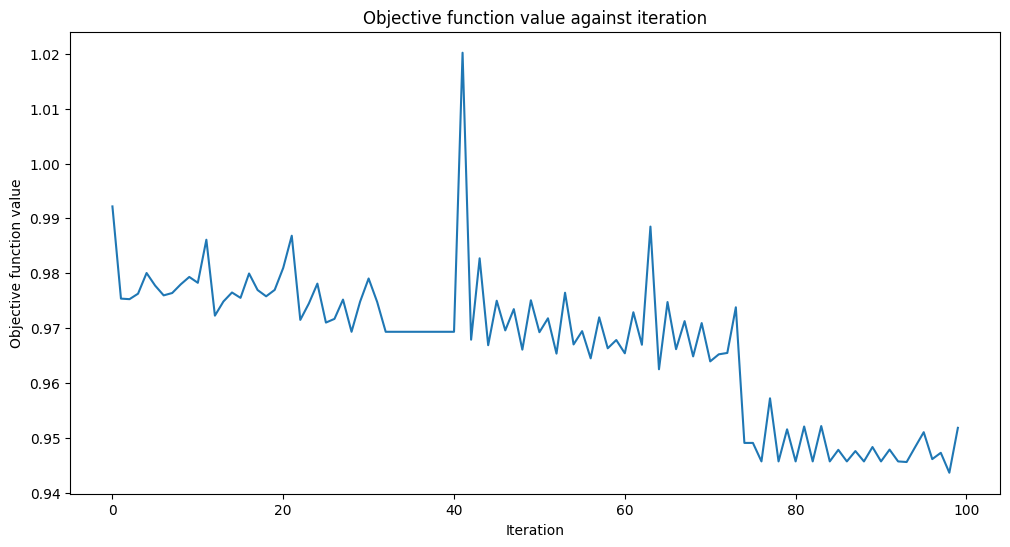

Training time: 24867 seconds


In [18]:
train_features = train_features.reshape(-1, 10)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [19]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.69
Quantum VQC on the test dataset:     0.66


## Feature Engineering: Reducing Number Of Features

<AxesSubplot: >

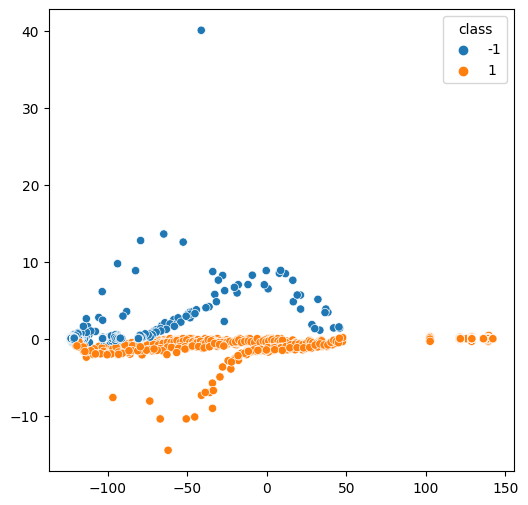

In [13]:
features = PCA(n_components=2).fit_transform(features)
labels = df['class']

plt.rcParams["figure.figsize"] = (6, 6)
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=labels, palette="tab10")

In [14]:
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

svc = SVC()

svc.fit(train_features, train_labels)

train_score_c2 = svc.score(train_features, train_labels)
test_score_c2 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c2:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c2:.2f}")

Classical SVC on the training dataset: 0.96
Classical SVC on the test dataset:     0.96


In [15]:
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

In [16]:
num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
ansatz = RealAmplitudes(num_qubits=num_features, reps=3)

In [ ]:
optimizer = COBYLA(maxiter=40)

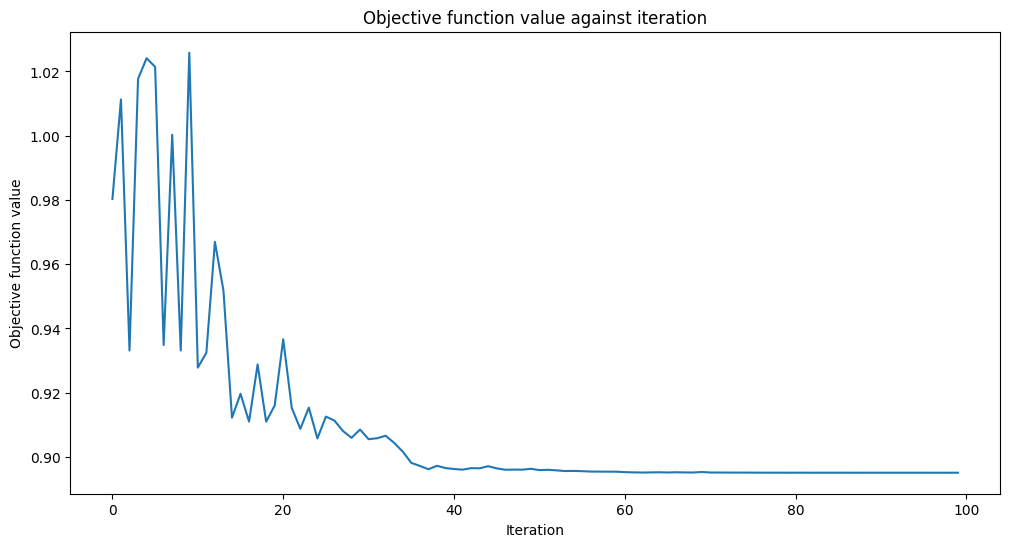

Training time: 1485 seconds


In [23]:
train_features = train_features.reshape(-1, 2)
train_labels = train_labels.values

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

# make the objective function plot look nicer.
plt.rcParams["figure.figsize"] = (12, 6)


start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [24]:
train_score_q2_ra = vqc.score(train_features, train_labels)
test_score_q2_ra = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using RealAmplitudes: {train_score_q2_ra:.2f}")
print(f"Quantum VQC on the test dataset using RealAmplitudes:     {test_score_q2_ra:.2f}")

Quantum VQC on the training dataset using RealAmplitudes: 0.66
Quantum VQC on the test dataset using RealAmplitudes:     0.63


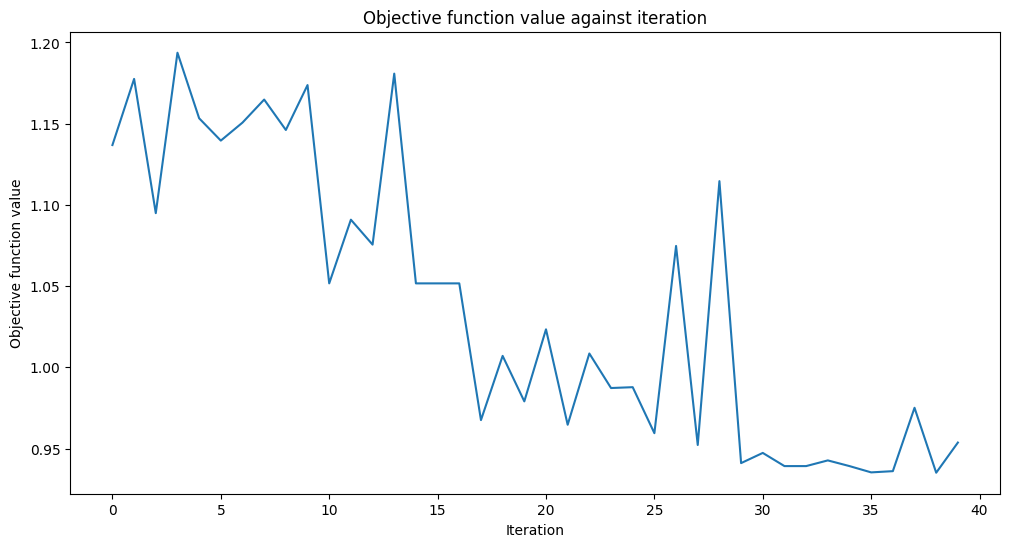

Training time: 887 seconds


In [25]:
from qiskit.circuit.library import EfficientSU2

ansatz = EfficientSU2(num_qubits=num_features, reps=3)
optimizer = COBYLA(maxiter=40)

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

In [27]:
train_score_q2_eff = vqc.score(train_features, train_labels)
test_score_q2_eff = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset using EfficientSU2: {train_score_q2_eff:.2f}")
print(f"Quantum VQC on the test dataset using EfficientSU2:     {test_score_q2_eff:.2f}")

Quantum VQC on the training dataset using EfficientSU2: 0.66
Quantum VQC on the test dataset using EfficientSU2:     0.64


## Vanilla SVC

In [28]:
svc = SVC()
_ = svc.fit(train_features, train_labels)  # suppress printing the return value

train_score_c4 = svc.score(train_features, train_labels)
test_score_c4 = svc.score(test_features, test_labels)

print(f"Classical SVC on the training dataset: {train_score_c4:.2f}")
print(f"Classical SVC on the test dataset:     {test_score_c4:.2f}")

Classical SVC on the training dataset: 0.96
Classical SVC on the test dataset:     0.96


In [30]:
print(f"Model                           | Test Score | Train Score")
print(f"SVC, 4 features                 | {train_score_c4:10.2f} | {test_score_c4:10.2f}")
# print(f"VQC, 4 features, RealAmplitudes | {train_score_q4:10.2f} | {test_score_q4:10.2f}")
print(f"----------------------------------------------------------")
print(f"SVC, 2 features                 | {train_score_c2:10.2f} | {test_score_c2:10.2f}")
print(f"VQC, 2 features, RealAmplitudes | {train_score_q2_ra:10.2f} | {test_score_q2_ra:10.2f}")
print(f"VQC, 2 features, EfficientSU2   | {train_score_q2_eff:10.2f} | {test_score_q2_eff:10.2f}")

Model                           | Test Score | Train Score
SVC, 4 features                 |       0.96 |       0.96
----------------------------------------------------------
SVC, 2 features                 |       0.96 |       0.96
VQC, 2 features, RealAmplitudes |       0.66 |       0.63
VQC, 2 features, EfficientSU2   |       0.66 |       0.64


## DATASET
https://ieee-dataport.org/open-access/dataset-binary-classification-digital-sensor-signals

## REFERENCES
https://qiskit.org/ecosystem/machine-learning/tutorials/02a_training_a_quantum_model_on_a_real_dataset.html#3.-Training-a-Quantum-Machine-Learning-Model <br>
https://www.qmunity.tech/tutorials/building-a-variational-quantum-classifier <br>
https://learn.qiskit.org/course/machine-learning/training-quantum-circuits